# (1) Import of needed libraries

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk import bigrams

import gensim
from gensim import corpora

from gensim.models import TfidfModel
import numpy as np

from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

from gensim.models.ldamodel import LdaModel
from pprint import pprint

from gensim.models import HdpModel

# (2) Import of complaint data

In [2]:
df = pd.read_csv('complaints.csv',dtype = {'ZIP code': str})

pd.set_option('display.max_colwidth', None)

df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TX,78541,Servicemember,NaN,Web,2022-11-19,In progress,Yes,NaN,6222374
1,2022-10-13,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,"In accordance with the fair credit reporting act XXXX account XXXX XXXX # XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Has violated my rights,15 U.S.C.1681 section 602 A states that I have a right to my privacy. 1 5 U.S.C. 1681 section 602 A section 2 states a consumer reporting company can not furnish an account without my written instructions which I have never given.",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30043,NaN,Consent provided,Web,2022-10-13,Closed with explanation,Yes,NaN,6079679
2,2022-10-13,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,"This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Again, I was going through my records & noticed the fraudulent accounts which do not belong to me STILL reposting on my file in Transunion. The other bureaus have already DELETED this fraudulent information so my question is why do you still report these damaging records? I also contacted XXXX XXXX XXXX and then talked to their staff, and they agreed to remove the accounts from my file. I have already disputed these accounts several times and stated that I am an identity theft victim. I even forwarded my FTC report I filed online on their website along with my personal information and documents but still, you chose to continue reporting these accounts. Credit Bureaus are bound to comply with the FCRA regulation section 605b but you never cared nor paid any attention to my Disputes. You became negligent of the FCRA law and continued reporting this information on my Credit File without Proper Verification or Investigation. Now, I want you to REMOVE these items from my file like the other bureaus have done. \n\nXXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,90660,NaN,Consent provided,Web,2022-10-13,Closed with non-monetary relief,Yes,NaN,6076990
3,2022-10-12,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19148,NaN,Consent not provided,Web,2022-10-12,Closed with non-monetary relief,Yes,NaN,6080312
4,2022-11-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Na

# (3) Data Pre-Processing

## (3.1.a) Data Filtering (1/2)

Number of documents: 1164


<Axes: xlabel='Product'>

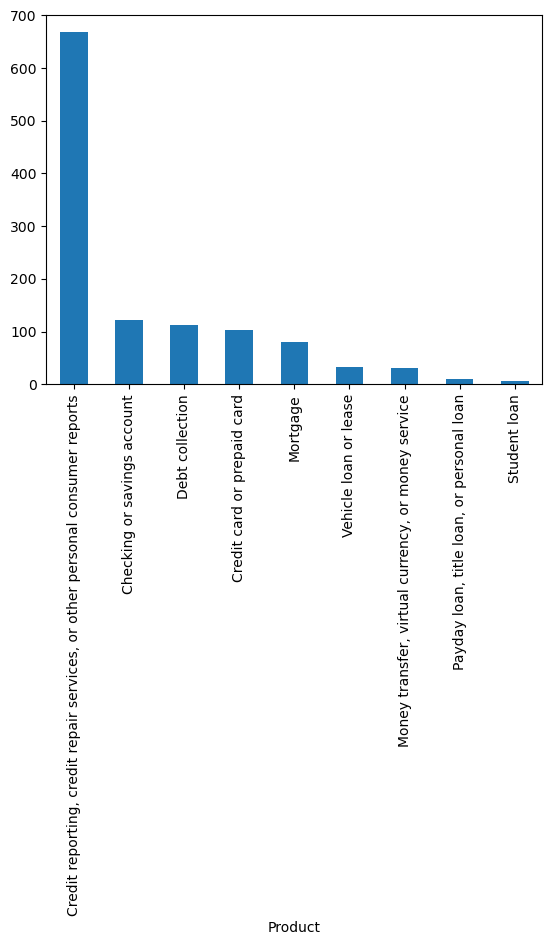

In [3]:
df = df[['Date received', 'Product','Consumer complaint narrative']]
df['Date received']= pd.to_datetime(df['Date received'])

df = df[df['Consumer complaint narrative'].notna()]

df = df[(df['Date received'].dt.year == 2022) & (df['Date received'].dt.month == 11)]

print("Number of documents:", len(df))

df['Product'].value_counts().plot(kind='bar')

## (3.1.b) Data Filtering (2/2)

In [4]:
df = df[(df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports') ]
print("Number of documents:", len(df))

Number of documents: 668


## (3.2) Tokenization including removal of stopwords, capitalization & filtering on alphabetic data

In [5]:
stopwords = stopwords.words('english') + ["xx", "xxxx","im","please","xxxxxxxx"]

def tokenize (column):
    token_data = nltk.word_tokenize(column)
    return [w.lower() for w in token_data if w.lower() not in stopwords and w.isalpha() and len(w)>2]


df['token_data'] = df['Consumer complaint narrative'].apply(lambda x: tokenize(x))

df.head()

,Date received,Product,Consumer complaint narrative,token_data
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]"
265,2022-11-05,"Credit reporting, credit repair services, or other personal consumer reports","My name is XXXX XXXX this complaint is not made in error neither is it being made by a third party.I declare under penalty of perjury I am alleging that a person or company- without my authorization- from unauthorized use of my social security number and card used my personal identifying information to apply for goods, services, or money ; and, was successful in creating some accounts. I have no knowledge of this and All is being investigated by the FTC.","[name, complaint, made, error, neither, made, third, declare, penalty, perjury, alleging, person, without, unauthorized, use, social, security, number,

## (3.3.a) Lemmatization (without POS)

In [6]:
#lm = WordNetLemmatizer()

#df['lemmatized_tokens'] = df['token_data'].apply(lambda token_list: [lm.lemmatize(token) for token in token_list])

#df.head()

## (3.3.b) Lemmatization (with POS)

In [7]:
#df['Pos_Tag'] = df['token_data'].apply(lambda token_list: nltk.pos_tag(token_list))

#def lemmatize_with_pos(token_list):
    #lemmatized_tokens = []
    #for token, tag in token_list:
        #if tag.startswith('N'):  # Noun
            #lemmatized_tokens.append(lm.lemmatize(token, 'n'))
        #elif tag.startswith('V'):  # Verb
            #lemmatized_tokens.append(lm.lemmatize(token, 'v'))
        #elif tag.startswith('R'):  # Adverb
            #lemmatized_tokens.append(lm.lemmatize(token, 'r'))
        #elif tag.startswith('J'):  # Adjective
            #lemmatized_tokens.append(lm.lemmatize(token, 'a'))
        #else:
            #lemmatized_tokens.append(lm.lemmatize(token))
    #return lemmatized_tokens

#df['lemmatized_pos_tokens'] = df['Pos_Tag'].apply(lambda token_list: lemmatize_with_pos(token_list))

#df.drop('Pos_Tag', axis=1)

#df.head()

## (3.3.c) Lemmatization (with POS) including only nouns and adjectives

In [8]:
#df['Pos_Tag'] = df['token_data'].apply(lambda token_list: nltk.pos_tag(token_list))

#def lemmatize_nouns_adjectives(token_list):
    #lemmatized_tokens = []
    #for token, tag in token_list:
        #if tag.startswith('N') or tag.startswith('J'):
            #lemmatized_tokens.append(lm.lemmatize(token, pos = 'a' if tag.startswith('J') else 'n'))
    #return lemmatized_tokens

#df['lemmatized_pos_tokens']=df['Pos_Tag'].apply(lambda token_list: lemmatize_nouns_adjectives(token_list))

#df.drop('Pos_Tag', axis =1)

#df.head()

## (3.3.d) Stemming including filtering on nouns + adjectives only

In [9]:
def pos_tagging (token_data):
    pos_tags = pos_tag(token_data)
    filtered_tokens = [word for word, pos in pos_tags if pos.startswith('N') or pos.startswith('J')]
    return filtered_tokens


def stemming (filtered_tokens):
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(word) for word in filtered_tokens]
    return tokens_stemmed

df['filtered_data']=df['token_data'].apply(pos_tagging)

df['stemmed_data']=df['filtered_data'].apply(stemming)

df.head()

,Date received,Product,Consumer complaint narrative,token_data,filtered_data,stemmed_data
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]","[several, inaccurate, personal, information, credit, report, difficulties, fraud, error, credit, reporting]","[sever, inaccur, person, inform, credit, report, difficulti, fraud, error, credit, report]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]","[duplicate, complaint, third, party, filing, complaint, complaint, letter, law, multiple, requests, account, credit, report, violation, federal, law, section, consumers, information, file, sources, report, recipients, experian, request, subject, consumer, consumer, file, requests, social, security, number, similar, identification, number, consumer, disclosure, consumer, reporting, agency, appropriate, proof, identity, requester, consumer, reporting, agency, number, disclo

## (3.4) n-gram Implementation

In [10]:
#def ngrams(text):
    #bigram = gensim.models.Phrases(text)
    #trigram = gensim.models.Phrases(bigram[text])
    #bigram_mod = gensim.models.phrases.Phraser(bigram)
    #trigram_mod = gensim.models.phrases.Phraser(trigram)
    #return [trigram_mod[bigram_mod[doc]] for doc in text]

#def bigrams(text):
    #bigram = gensim.models.Phrases(text)
    #bigram_mod = gensim.models.phrases.Phraser(bigram)
    #return [bigram_mod[doc] for doc in text]

#df['stemmed_data']=df['stemmed_data'].apply(lambda x:[x])
#df['bigrams']=df['stemmed_data'].apply(bigrams)

#df['bigrams']=[item for sublist in df['bigrams'] for item in sublist]

#df.head()

def create_bigrams(tokens_stemmed):
    bi_grams = list(bigrams(tokens_stemmed))
    return [' '.join(pair) for pair in bi_grams]

df['bigrams']=df['stemmed_data'].apply(create_bigrams)

df.head()

,Date received,Product,Consumer complaint narrative,token_data,filtered_data,stemmed_data,bigrams
86,2022-11-07,"Credit reporting, credit repair services, or other personal consumer reports",There were several inaccurate personal information in my credit report. I am having difficulties in getting them removed. It might be caused by fraud or error on credit reporting.,"[several, inaccurate, personal, information, credit, report, difficulties, getting, removed, might, caused, fraud, error, credit, reporting]","[several, inaccurate, personal, information, credit, report, difficulties, fraud, error, credit, reporting]","[sever, inaccur, person, inform, credit, report, difficulti, fraud, error, credit, report]","[sever inaccur, inaccur person, person inform, inform credit, credit report, report difficulti, difficulti fraud, fraud error, error credit, credit report]"
261,2022-11-01,"Credit reporting, credit repair services, or other personal consumer reports","This is not a duplicate nor is this complaint filed by a third party. I am filing this complaint myself. Please see this complaint is processed to the letter of the law. Regardless of the multiple written requests, the unverified account listed below is still reporting on my credit report in violation of federal law. Under Section 609 ( a ) ( 1 ) ( A ) Disclosures to consumers [ 15 U.S.C. 1681g ] ( ( a ) Information on file ; sources ; report recipients. Experian shall, upon request, and subject to 610 ( a ) ( 1 ) [ 1681h ], clearly and accurately disclose to the consumer. If the consumer to whom the file relates requests that the first 5 digits of the social security number ( or similar identification number ) of the consumer not be included in the disclosure and the consumer reporting agency has received appropriate proof of the identity of the requester, the consumer reporting agency shall so truncate such number in such disclosure. & Section 611 ( a ) ( 1 ) ( A ) Procedure in case of disputed accuracy [ 15 U.S.C. 1681i ] ( a ) Reinvestigations of Disputed Information. If the completeness or accuracy of any item of information contained in my file at Experian is disputed by the consumer and the consumer notifies the agency directly, or indirectly through a creditor, the Bureaus shall, free of charge, conduct a reasonable reinvestigation to determine whether the disputed information is inaccurate and record the current status of the disputed information or delete the items from my file in accordance with paragraph ( 5 ), before the end of the 30-day period beginning on the date on which the agency receives the notice of the dispute from the consumer or creditor. The account below should be corrected ASAP : XXXX XXXX XXXX XXXXXXXX","[duplicate, complaint, filed, third, party, filing, complaint, see, complaint, processed, letter, law, regardless, multiple, written, requests, unverified, account, listed, still, reporting, credit, report, violation, federal, law, section, disclosures, consumers, information, file, sources, report, recipients, experian, shall, upon, request, subject, clearly, accurately, disclose, consumer, consumer, file, relates, requests, first, digits, social, security, number, similar, identification, number, consumer, included, disclosure, consumer, reporting, agency, received, appropriate, proof, identity, requester, consumer, reporting, agency, shall, truncate, number, disclosure, section, procedure, case, disputed, accuracy, reinvestigations, disputed, information, completeness, accuracy, item, information, contained, file, experian, disputed, consumer, consumer, notifies, agency, directly, indirectly, creditor, bureaus, shall, free, charge, ...]","[duplicate, complaint, third, party, filing, complaint, complaint, letter, law, multiple, requests, account, credit, report, violation, federal, law, section, consumers, information, file, sources, report, recipients, experian, request, subject, consumer, consumer, file, requests, social, security, number, si

## (3.5) Final pre-processed data

Top 50 most common words:
[('credit report', 652), ('consum report', 244), ('report agenc', 221), ('credit bureau', 212), ('ident theft', 138), ('fair credit', 109), ('report act', 109), ('inquiri credit', 105), ('date inquiri', 101), ('section state', 100), ('inquiri date', 96), ('inform credit', 95), ('credit file', 88), ('inform consum', 78), ('section consum', 77), ('consum consum', 72), ('report inquiri', 72), ('person inform', 71), ('account credit', 70), ('section section', 69), ('agenc furnish', 69), ('furnish account', 69), ('account instruct', 65), ('accord fair', 61), ('credit card', 61), ('item inform', 59), ('victim ident', 56), ('letter credit', 50), ('inform inaccur', 47), ('item credit', 47), ('state privaci', 46), ('privaci section', 46), ('legal action', 46), ('inform report', 44), ('usc section', 43), ('third parti', 42), ('delet account', 42), ('consum credit', 42), ('report account', 41), ('busi day', 41), ('sent letter', 38), ('valid report', 37), ('right section'

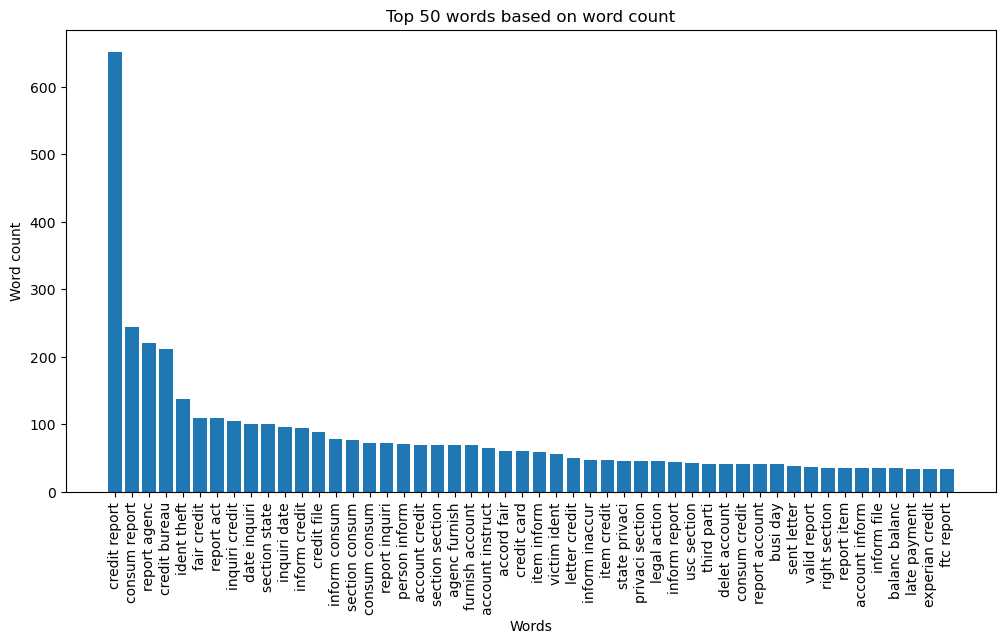

Top 50 words based on word count and their frequency:
{'credit report': 0.9760479041916168, 'consum report': 0.3652694610778443, 'report agenc': 0.33083832335329344, 'credit bureau': 0.31736526946107785, 'ident theft': 0.20658682634730538, 'fair credit': 0.1631736526946108, 'report act': 0.1631736526946108, 'inquiri credit': 0.15718562874251496, 'date inquiri': 0.15119760479041916, 'section state': 0.1497005988023952, 'inquiri date': 0.1437125748502994, 'inform credit': 0.14221556886227546, 'credit file': 0.1317365269461078, 'inform consum': 0.11676646706586827, 'section consum': 0.11526946107784432, 'consum consum': 0.10778443113772455, 'report inquiri': 0.10778443113772455, 'person inform': 0.1062874251497006, 'account credit': 0.10479041916167664, 'section section': 0.10329341317365269, 'agenc furnish': 0.10329341317365269, 'furnish account': 0.10329341317365269, 'account instruct': 0.09730538922155689, 'accord fair': 0.09131736526946108, 'credit card': 0.09131736526946108, 'item in

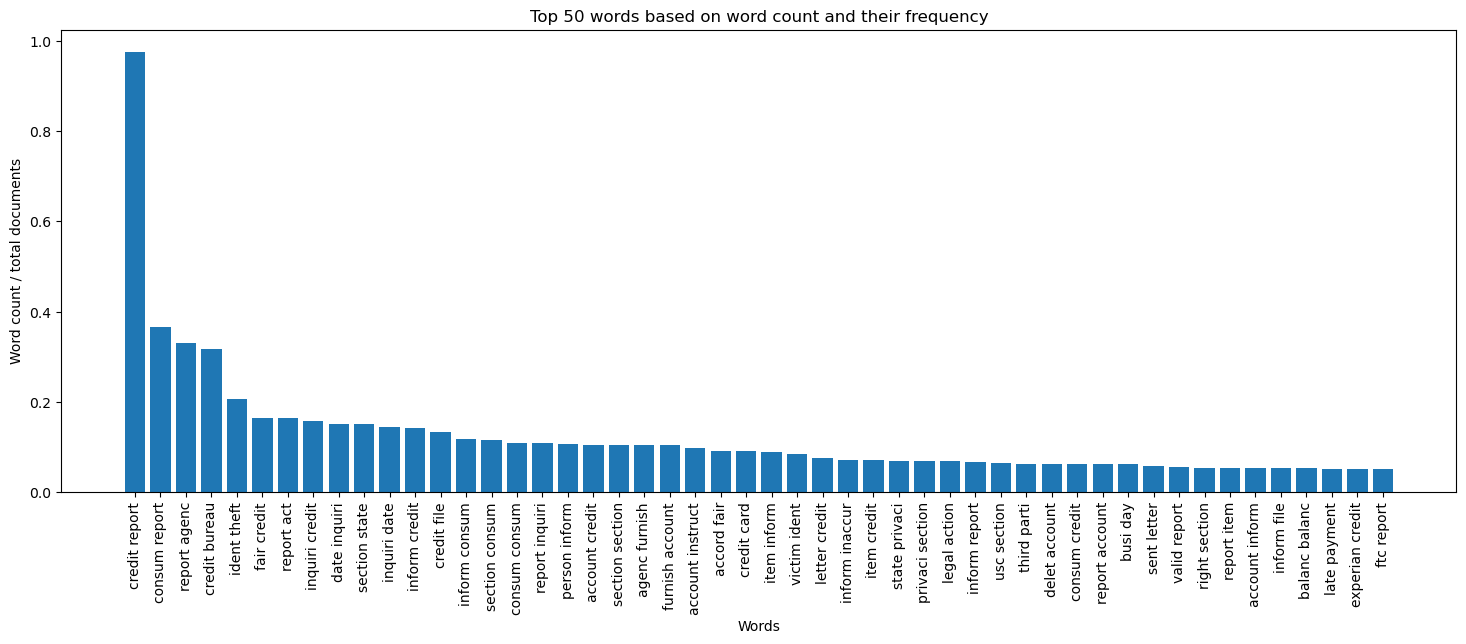

In [11]:
corpus_Top50 = df['bigrams'].tolist()

list_of_lists = [word for sublist in corpus_Top50 for word in sublist]

word_freq = FreqDist(list_of_lists)
top_50_words = dict(word_freq.most_common(50))

print("Top 50 most common words:")
print(word_freq.most_common(50))

plt.figure(figsize=(12,6))
plt.bar(top_50_words.keys(), top_50_words.values())
plt.xticks(rotation='vertical')
plt.title('Top 50 words based on word count')
plt.xlabel('Words')
plt.ylabel('Word count')
plt.show()

no_documents = len(df)

word_freq_share = {word: freq / no_documents for word, freq in top_50_words.items()}
print("Top 50 words based on word count and their frequency:")
print(word_freq_share)

plt.figure(figsize=(18,6))
plt.bar(list(word_freq_share.keys())[:50], list(word_freq_share.values())[:50])
plt.xticks(rotation='vertical')
plt.title('Top 50 words based on word count and their frequency')
plt.xlabel('Words')
plt.ylabel('Word count / total documents')
plt.show()

In [12]:
frequency_threshold = 0.5

tokenized_data = df['bigrams']

list_tokenized_data = df['bigrams'].tolist()
list_of_lists_full = [word for sublist in list_tokenized_data for word in sublist]

word_freq_full = FreqDist(list_of_lists_full)

words_full = dict(word_freq_full)

no_documents_full = len(df)

word_freq_share_full = {word: freq / no_documents_full for word, freq in words_full.items()}

filtered_data = [[word for word in doc if word_freq_share_full[word] <= frequency_threshold] for doc in tokenized_data]

# (4) Vectorization

## (4.1) BoW

In [13]:
corpus = filtered_data
dictionary = corpora.Dictionary(corpus)

dictionary.filter_extremes(no_below=10, no_above=0.95)

bow = [dictionary.doc2bow(text) for text in corpus] 

id_words_bow = [[(dictionary[id], count) for id, count in line] for line in bow]

print(id_words_bow[:5])

[[('inform credit', 1), ('person inform', 1)], [('accord paragraph', 1), ('account credit', 1), ('accuraci item', 1), ('accuraci reinvestig', 1), ('agenc appropri', 1), ('agenc creditor', 1), ('agenc disput', 1), ('agenc number', 1), ('appropri proof', 1), ('case accuraci', 1), ('charg conduct', 1), ('complet accuraci', 1), ('conduct reason', 1), ('consum consum', 2), ('consum creditor', 1), ('consum disclosur', 1), ('consum file', 1), ('consum inform', 1), ('consum notifi', 1), ('consum report', 2), ('current statu', 1), ('date agenc', 1), ('delet item', 1), ('determin inform', 1), ('disclosur consum', 1), ('disclosur section', 1), ('disput consum', 1), ('end period', 1), ('feder law', 1), ('file accord', 1), ('file complaint', 1), ('file experian', 1), ('file request', 1), ('file sourc', 1), ('free charg', 1), ('ident request', 1), ('identif number', 1), ('inaccur record', 1), ('inform complet', 1), ('inform delet', 1), ('inform file', 2), ('inform inaccur', 1), ('item file', 1), ('i

## (4.2) TF-IDF 

In [14]:
tfidf_model = TfidfModel(dictionary=dictionary, smartirs='ntc')
tfidf = [tfidf_model[dictionary.doc2bow(text)] for text in corpus]

id_words_tfidf = [[(dictionary[id], np.around(freq,decimals=2)) for id, freq in line] for line in tfidf_model[bow]]

print(id_words_tfidf[:5])

[[('inform credit', 0.66), ('person inform', 0.75)], [('accord paragraph', 0.11), ('account credit', 0.07), ('accuraci item', 0.11), ('accuraci reinvestig', 0.12), ('agenc appropri', 0.1), ('agenc creditor', 0.12), ('agenc disput', 0.11), ('agenc number', 0.13), ('appropri proof', 0.12), ('case accuraci', 0.11), ('charg conduct', 0.11), ('complet accuraci', 0.11), ('conduct reason', 0.11), ('consum consum', 0.16), ('consum creditor', 0.12), ('consum disclosur', 0.13), ('consum file', 0.1), ('consum inform', 0.1), ('consum notifi', 0.11), ('consum report', 0.1), ('current statu', 0.11), ('date agenc', 0.11), ('delet item', 0.11), ('determin inform', 0.11), ('disclosur consum', 0.13), ('disclosur section', 0.13), ('disput consum', 0.11), ('end period', 0.11), ('feder law', 0.1), ('file accord', 0.11), ('file complaint', 0.13), ('file experian', 0.12), ('file request', 0.13), ('file sourc', 0.13), ('free charg', 0.12), ('ident request', 0.12), ('identif number', 0.12), ('inaccur record', 

# (5) Topic Modeling

## (5.1) Latent Semantic Analysis (LSA) / Latent Semantic Indexing (LSI) with BoW

Coherence score with 2 clusters: 0.6123390778899118
Coherence score with 3 clusters: 0.702635013651459
Coherence score with 4 clusters: 0.6792946429212052
Coherence score with 5 clusters: 0.7088436992024849
Coherence score with 6 clusters: 0.6293541733279197
Coherence score with 7 clusters: 0.572221727245212
Coherence score with 8 clusters: 0.6035733593845767
Coherence score with 9 clusters: 0.7031641717062983
Coherence score with 10 clusters: 0.6542365301699888
Coherence score with 11 clusters: 0.6003061500855845
Coherence score with 12 clusters: 0.5447825528960232
Coherence score with 13 clusters: 0.5805710693042098
Coherence score with 14 clusters: 0.528744158351856
Coherence score with 15 clusters: 0.4947362775100684
Coherence score with 16 clusters: 0.5206867154911416
Coherence score with 17 clusters: 0.5450220700755349
Coherence score with 18 clusters: 0.5397210895716104
Coherence score with 19 clusters: 0.5075211779052358
Coherence score with 20 clusters: 0.4894964371570749


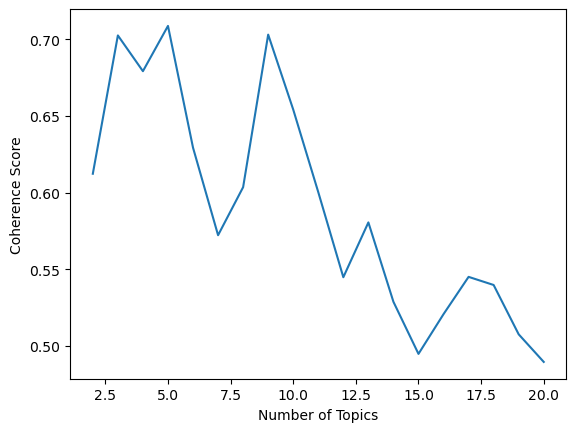

5


In [15]:
df['Assigned_topic_lsi_bow'] = None
df['Topic_score_lsi_bow'] = None

topics = []
score=[]

for i in range(2,21):
    lsi = LsiModel(bow, num_topics = i, id2word = dictionary, power_iters=10)
    coherence_model = CoherenceModel(model=lsi, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))
    
    topics.append(i)
    score.append(coherence_model.get_coherence())
    
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict = dict(zip(topics, score))
max_dict = max(zip(topic_score_dict.values(),topic_score_dict.keys()))[1]
print(max_dict)

In [16]:
lsi_bow = LsiModel(bow, num_topics=max_dict, id2word=dictionary,power_iters=5)

for topic_num, words in lsi_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.593*"inquiri credit" + 0.580*"date inquiri" + 0.556*"report inquiri" + 0.027*"unauthor inquiri" + 0.025*"report consent" + 0.019*"credit bureau" + 0.015*"sent letter" + 0.015*"updat item" + 0.013*"account account" + 0.013*"account number".
Words in 1: 0.516*"consum report" + 0.410*"report agenc" + 0.208*"section state" + 0.175*"consum consum" + 0.173*"item inform" + 0.154*"fair credit" + 0.150*"section consum" + 0.145*"report act" + 0.142*"inform consum" + 0.129*"agenc furnish".
Words in 2: 0.351*"ident theft" + -0.178*"consum report" + 0.140*"inform report" + 0.132*"credit bureau" + 0.128*"ftc report" + 0.111*"victim ident" + 0.109*"busi day" + 0.105*"valid report" + 0.102*"belong requir" + 0.101*"agenc appropri".
Words in 3: 0.229*"credit bureau" + -0.178*"section state" + 0.154*"inform file" + 0.147*"consum consum" + 0.142*"agenc disput" + 0.114*"current statu" + 0.114*"consum file" + 0.113*"accuraci item" + 0.113*"item file" + 0.113*"conduct reason".
Words in 4: 0.442

## (5.2) Latent Semantic Analysis (LSA) / Latent Semantic Indexing (LSI) with Tf-Idf

Coherence score with 2 clusters: 0.5806105639453286
Coherence score with 3 clusters: 0.5350017538143942
Coherence score with 4 clusters: 0.6322166561588396
Coherence score with 5 clusters: 0.5879062739072716
Coherence score with 6 clusters: 0.5602031873593223
Coherence score with 7 clusters: 0.5264936676846328
Coherence score with 8 clusters: 0.6040833680928357
Coherence score with 9 clusters: 0.4706311012934866
Coherence score with 10 clusters: 0.5230934240079148
Coherence score with 11 clusters: 0.4450508301497319
Coherence score with 12 clusters: 0.42824515144363257
Coherence score with 13 clusters: 0.4252877720097097
Coherence score with 14 clusters: 0.4838858580216547
Coherence score with 15 clusters: 0.4975065418448692
Coherence score with 16 clusters: 0.4680828692970825
Coherence score with 17 clusters: 0.44595847791912907
Coherence score with 18 clusters: 0.4274874865721905
Coherence score with 19 clusters: 0.5113369135619658
Coherence score with 20 clusters: 0.4824695055343346

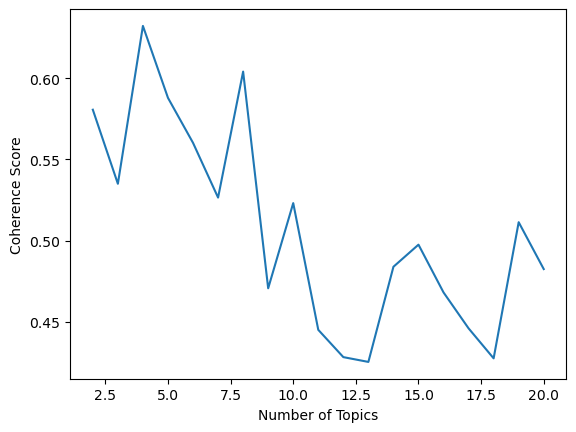

4
Words in 0: 0.358*"consum report" + 0.285*"report agenc" + 0.229*"section state" + 0.216*"agenc furnish" + 0.214*"furnish account" + 0.213*"fair credit" + 0.208*"report act" + 0.207*"account instruct" + 0.206*"section section" + 0.203*"accord fair".
Words in 1: -0.329*"credit bureau" + -0.280*"inform credit" + -0.271*"ident theft" + -0.217*"person inform" + -0.215*"credit file" + -0.175*"victim ident" + -0.160*"account credit" + -0.139*"letter credit" + -0.123*"hard inquiri" + 0.108*"state privaci".
Words in 2: 0.257*"involv review" + 0.257*"gotten respons" + 0.257*"respons name" + 0.257*"parti involv" + 0.257*"review letter" + 0.257*"bureau gotten" + 0.257*"sure mail" + 0.256*"complaint inform" + 0.252*"mail letter" + 0.251*"inform third".
Words in 3: 0.561*"hard inquiri" + 0.326*"inquiri credit" + -0.287*"ident theft" + -0.231*"victim ident" + 0.189*"credit card" + -0.171*"specif record" + -0.170*"servic money" + 0.150*"credit score" + -0.118*"product servic" + 0.110*"account credi

In [17]:

topics_LSI_tfidf = []
score_LSI_tfidf=[]

for i in range(2,21):
    lsi_tfidf = LsiModel(tfidf, num_topics = i, id2word = dictionary, power_iters = 10)
    coherence_model_tfidf = CoherenceModel(model=lsi_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_tfidf = coherence_model_tfidf.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_tfidf))
    
    topics_LSI_tfidf.append(i)
    score_LSI_tfidf.append(coherence_model_tfidf.get_coherence())
    
_=plt.plot(topics_LSI_tfidf, score_LSI_tfidf)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_tfidf = dict(zip(topics_LSI_tfidf, score_LSI_tfidf))
max_dict_tfidf = max(zip(topic_score_dict_tfidf.values(),topic_score_dict_tfidf.keys()))[1]
print(max_dict_tfidf)

lsi_tfidf = LsiModel(tfidf, num_topics=max_dict_tfidf, id2word=dictionary,power_iters=10)

for topic_num, words in lsi_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

In [18]:
lsi_tfidf = LsiModel(tfidf, num_topics=max_dict_tfidf, id2word=dictionary,power_iters=10)

for topic_num, words in lsi_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.358*"consum report" + 0.285*"report agenc" + 0.229*"section state" + 0.216*"agenc furnish" + 0.214*"furnish account" + 0.213*"fair credit" + 0.208*"report act" + 0.207*"account instruct" + 0.206*"section section" + 0.203*"accord fair".
Words in 1: 0.329*"credit bureau" + 0.280*"inform credit" + 0.271*"ident theft" + 0.217*"person inform" + 0.215*"credit file" + 0.175*"victim ident" + 0.160*"account credit" + 0.139*"letter credit" + 0.123*"hard inquiri" + -0.108*"state privaci".
Words in 2: 0.257*"involv review" + 0.257*"gotten respons" + 0.257*"respons name" + 0.257*"parti involv" + 0.257*"review letter" + 0.257*"bureau gotten" + 0.257*"sure mail" + 0.256*"complaint inform" + 0.252*"mail letter" + 0.251*"inform third".
Words in 3: -0.561*"hard inquiri" + -0.326*"inquiri credit" + 0.287*"ident theft" + 0.231*"victim ident" + -0.189*"credit card" + 0.171*"specif record" + 0.170*"servic money" + -0.150*"credit score" + 0.118*"product servic" + -0.110*"account credit".


## (5.3) Latent Dirichlet Allocation (LDA) with BoW

Coherence score with 2 clusters: 0.5512569678798696
Coherence score with 3 clusters: 0.48347336966529325
Coherence score with 4 clusters: 0.38437874940846684
Coherence score with 5 clusters: 0.4641907943697531
Coherence score with 6 clusters: 0.45223640715347463
Coherence score with 7 clusters: 0.42843201641610307
Coherence score with 8 clusters: 0.43367805788884456
Coherence score with 9 clusters: 0.4334375246998604
Coherence score with 10 clusters: 0.5338003105360728
Coherence score with 11 clusters: 0.46305525828014793
Coherence score with 12 clusters: 0.5147248355344054
Coherence score with 13 clusters: 0.5498072745306666
Coherence score with 14 clusters: 0.4363273165475112
Coherence score with 15 clusters: 0.4495501625001856
Coherence score with 16 clusters: 0.4968467174818727
Coherence score with 17 clusters: 0.42790627689652727
Coherence score with 18 clusters: 0.427167527079197
Coherence score with 19 clusters: 0.5270567439828251
Coherence score with 20 clusters: 0.482628845348

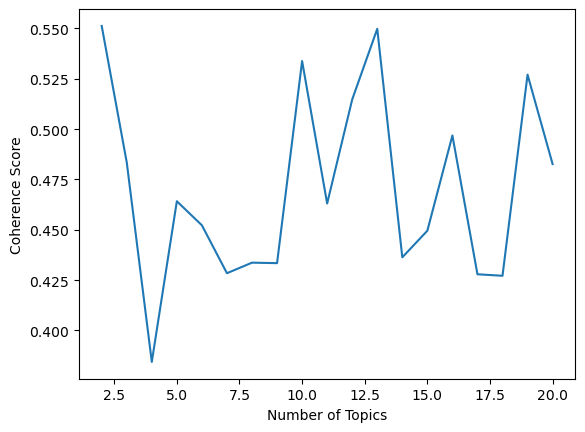

2


In [19]:
topics_LDA_bow = []
score_LDA_bow=[]

for i in range(2,21):
    lda_bow = LdaModel(corpus=bow,id2word=dictionary, num_topics = i, iterations = 100)
    coherence_model_lda_bow = CoherenceModel(model=lda_bow, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_lda_bow = coherence_model_lda_bow.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_lda_bow))
    
    topics_LDA_bow.append(i)
    score_LDA_bow.append(coherence_model_lda_bow.get_coherence())
    
_=plt.plot(topics_LDA_bow, score_LDA_bow)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_lda_bow = dict(zip(topics_LDA_bow, score_LDA_bow))
max_dict_lda_bow = max(zip(topic_score_dict_lda_bow.values(),topic_score_dict_lda_bow.keys()))[1]
print(max_dict_lda_bow)

In [20]:
lda_bow = LdaModel(corpus=bow,id2word=dictionary, num_topics = max_dict_lda_bow, iterations = 100)

for topic_num, words in lda_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.030*"inquiri credit" + 0.024*"date inquiri" + 0.023*"ident theft" + 0.020*"report inquiri" + 0.019*"consum report" + 0.015*"credit bureau" + 0.011*"report agenc" + 0.010*"delet account" + 0.008*"hard inquiri" + 0.008*"date last".
Words in 1: 0.031*"report agenc" + 0.031*"consum report" + 0.027*"credit bureau" + 0.016*"report act" + 0.015*"fair credit" + 0.014*"section state" + 0.013*"inform credit" + 0.011*"credit file" + 0.011*"ident theft" + 0.011*"section consum".


## (5.4) Latent Dirichlet Allocation (LDA) with Tf-Idf

Coherence score with 2 clusters: 0.32891418491849067
Coherence score with 3 clusters: 0.46558611639917985
Coherence score with 4 clusters: 0.49122648262893126
Coherence score with 5 clusters: 0.41090502769075704
Coherence score with 6 clusters: 0.37200646258440995
Coherence score with 7 clusters: 0.38514851378683007
Coherence score with 8 clusters: 0.40625610565849224
Coherence score with 9 clusters: 0.38771248795912405
Coherence score with 10 clusters: 0.43704104504077995
Coherence score with 11 clusters: 0.38259106635965856
Coherence score with 12 clusters: 0.412857679419735
Coherence score with 13 clusters: 0.42081965099473523
Coherence score with 14 clusters: 0.3991106273568416
Coherence score with 15 clusters: 0.39163270239268594
Coherence score with 16 clusters: 0.4133969892216762
Coherence score with 17 clusters: 0.43176740079803677
Coherence score with 18 clusters: 0.40148227715217
Coherence score with 19 clusters: 0.4196900110062866
Coherence score with 20 clusters: 0.43242514

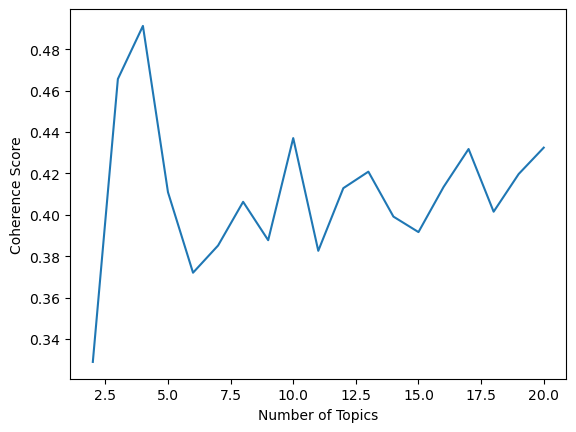

4


In [21]:
topics_LDA_tfidf = []
score_LDA_tfidf=[]

for i in range(2,21):
    lda_tfidf = LdaModel(corpus=tfidf,id2word=dictionary, num_topics = i, iterations = 100)
    coherence_model_lda_tfidf = CoherenceModel(model=lda_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
    coherence_score_lda_tfidf = coherence_model_lda_tfidf.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_lda_tfidf))
    
    topics_LDA_tfidf.append(i)
    score_LDA_tfidf.append(coherence_model_lda_tfidf.get_coherence())
    
_=plt.plot(topics_LDA_tfidf, score_LDA_tfidf)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

topic_score_dict_lda_tfidf = dict(zip(topics_LDA_tfidf, score_LDA_tfidf))
max_dict_lda_tfidf = max(zip(topic_score_dict_lda_tfidf.values(),topic_score_dict_lda_tfidf.keys()))[1]
print(max_dict_lda_tfidf)

In [22]:
lda_tfidf = LdaModel(corpus=tfidf,id2word=dictionary, num_topics = max_dict_lda_tfidf, iterations = 100)

for topic_num, words in lda_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.015*"report agenc" + 0.013*"consum report" + 0.011*"credit bureau" + 0.011*"sever time" + 0.010*"inquiri credit" + 0.010*"delet account" + 0.009*"sent letter" + 0.009*"letter credit" + 0.009*"late payment" + 0.009*"report delet".
Words in 1: 0.023*"credit bureau" + 0.016*"inform credit" + 0.016*"ident theft" + 0.015*"credit file" + 0.013*"report act" + 0.013*"report agenc" + 0.012*"victim ident" + 0.012*"inaccur name" + 0.012*"name address" + 0.012*"person inform".
Words in 2: 0.024*"person inform" + 0.018*"inform credit" + 0.018*"account credit" + 0.017*"credit card" + 0.015*"consum report" + 0.013*"inaccur inform" + 0.011*"compani credit" + 0.011*"credit profil" + 0.011*"ident theft" + 0.010*"report inform".
Words in 3: 0.019*"hard inquiri" + 0.019*"consum report" + 0.013*"section state" + 0.013*"report agenc" + 0.013*"section section" + 0.012*"fair credit" + 0.012*"phone number" + 0.012*"privaci section" + 0.012*"state privaci" + 0.012*"furnish account".


## (5.5) Hierarchical Dirichlet Process (HDP) with BoW

In [23]:
hdp_bow = HdpModel(corpus=bow,id2word=dictionary)

# Show top 10 words of each of the n topics
for topic_num, words in hdp_bow.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))
    
no_topics = topic_num

Words in 0: 0.019*valid item + 0.016*file subject + 0.016*verifi accuraci + 0.012*proof ident + 0.012*busi day + 0.012*rule bureau + 0.012*caus inform + 0.011*credit bureau + 0.011*proof time + 0.010*report inform.
Words in 1: 0.015*inquiri credit + 0.015*section credit + 0.012*item file + 0.011*local law + 0.011*statu inform + 0.011*bureau file + 0.011*sourc report + 0.010*file subject + 0.010*statement consum + 0.010*unauthor use.
Words in 2: 0.013*inspect servic + 0.013*delet account + 0.013*state postal + 0.011*section item + 0.011*day proof + 0.011*current statu + 0.010*inform inaccur + 0.010*correct complet + 0.010*report inaccur + 0.010*violat usc.
Words in 3: 0.026*penalti perjuri + 0.016*account belong + 0.012*inform need + 0.011*inform account + 0.011*frame law + 0.009*identif inform + 0.009*account open + 0.009*disput account + 0.009*item permiss + 0.009*inform inaccur.
Words in 4: 0.024*number consum + 0.016*section item + 0.014*charg conduct + 0.012*report crimin + 0.012*h

In [24]:
# Topic Coherence for HDP with BoW
coherence_model_hdp_bow = CoherenceModel(model=hdp_bow, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
coherence_score_hdp_bow = coherence_model_hdp_bow.get_coherence()
print('Coherence score with {} clusters: {}'.format(no_topics, coherence_score_hdp_bow))

Coherence score with 19 clusters: 0.49727941955087224


## (5.6) Hierarchical Dirichlet Process (HDP) with Tf-Idf

In [25]:
hdp_tfidf = HdpModel(corpus=tfidf,id2word=dictionary)

# Show top 10 words of each of the n topics
for topic_num, words in hdp_tfidf.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.013*inform transact + 0.013*ident disput + 0.013*inform record + 0.012*govern agenc + 0.012*identif number + 0.011*agenc furnish + 0.011*report sever + 0.009*languag experian + 0.009*compani credit + 0.009*inform consum.
Words in 1: 0.017*number similar + 0.011*stickler research + 0.011*crime anted + 0.010*inaccur inform + 0.010*report credit + 0.010*bureau file + 0.009*fair credit + 0.009*sure mail + 0.009*consum copi + 0.009*identifi inform.
Words in 2: 0.017*letter credit + 0.013*account report + 0.012*busi day + 0.010*report report + 0.010*delet item + 0.010*advers item + 0.010*fals inform + 0.009*record current + 0.009*contract signatur + 0.009*anted year.
Words in 3: 0.012*act account + 0.012*appropri feder + 0.011*inform good + 0.011*open end + 0.010*ident disput + 0.010*law account + 0.010*true accur + 0.009*contract signatur + 0.009*compani credit + 0.009*letter credit.
Words in 4: 0.016*theft credit + 0.015*section consum + 0.015*report bank + 0.014*act account 

In [26]:
# Topic Coherence for HDP with Tfidf
coherence_model_hdp_tfidf = CoherenceModel(model=hdp_tfidf, texts=filtered_data, dictionary=dictionary, coherence ='c_v')
coherence_score_hdp_tfidf = coherence_model_hdp_tfidf.get_coherence()
print('Coherence score with {} clusters: {}'.format(no_topics, coherence_score_hdp_tfidf))

Coherence score with 19 clusters: 0.5010832054502669
